In [2]:
%pip install seaborn

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats from norm
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('Aerofit.csv')

## Checking size of Rows and Columns

In [5]:
df.shape

(180, 9)

## Structure & Characteristics of the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 10.6+ KB


## Unique Values of Each Categorial Columns

In [7]:
pd.concat([df['MaritalStatus'],df['Gender'],df['Product']]).unique()

array(['Single', 'Partnered', 'Male', 'Female', 'KP281', 'KP481', 'KP781'],
      dtype=object)

In [8]:
pd.concat([df['MaritalStatus'],df['Gender'],df['Product']]).value_counts()

Partnered    107
Male         104
KP281         80
Female        76
Single        73
KP481         60
KP781         40
dtype: int64

## Sale Count & Percentage of each Product

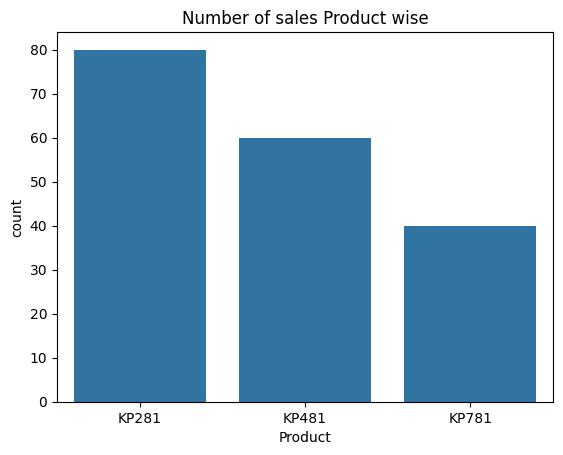

In [9]:
# Categorial (uni-variate):
sns.countplot(x ='Product', data = df)
plt.title("Number of sales Product wise")
plt.show()

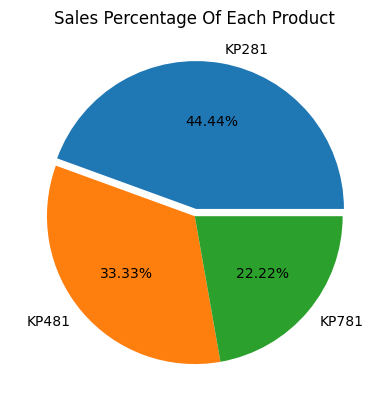

In [10]:
plt.pie(df['Product'].value_counts().values, labels=df['Product'].value_counts().index, explode=[0.05,0,0], autopct='%.2f%%')
plt.title("Sales Percentage Of Each Product")
plt.show()

## Boxplot To See Outlier Of Age In Each Product Male and Female wise

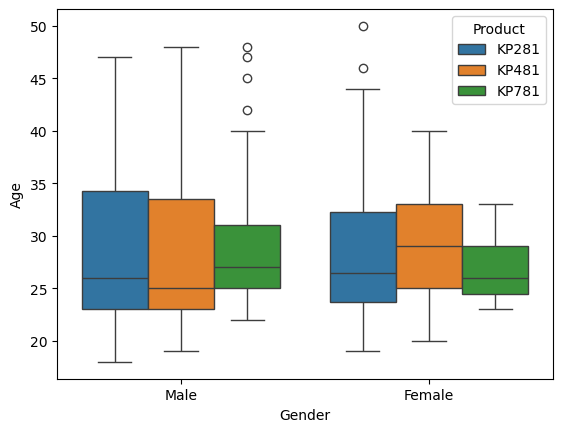

In [11]:
# Categorial-Categorial-Categorial(multi-veriate):
sns.boxplot(y=df['Age'], x=df['Gender'], hue=df['Product'])
plt.show()

## Violin Plot To Check Fitness

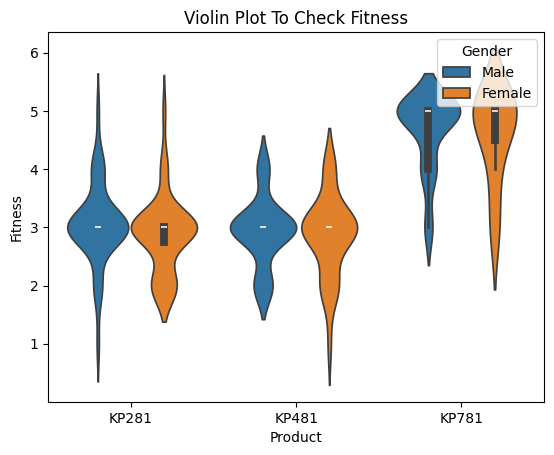

In [12]:
# Categorial-Numerical-Categorial ('multi-variate')
sns.violinplot(hue=df['Gender'], y=df['Fitness'], x=df['Product'])
plt.title("Violin Plot To Check Fitness")
plt.show()


#### In above plot we can easily see for kp281 and kp481 Average fitness is 3. Many male and female are near 3 fitness point. But for kp781 Average fitness point is 5 and many people are near about 5.

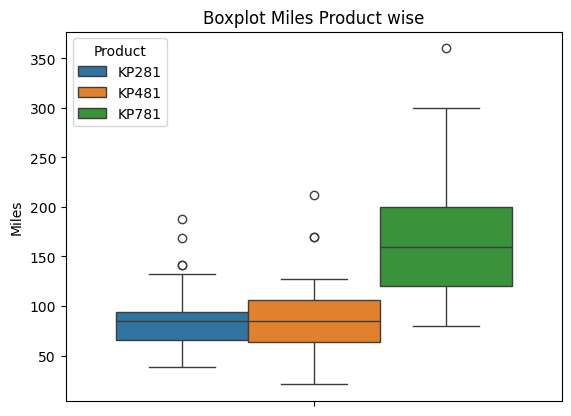

In [13]:
sns.boxplot(y=df['Miles'], hue =df['Product'])
plt.title("Boxplot Miles Product wise")
plt.show()

## Group by data with Product wise

In [14]:
gb = df.groupby('Product')
kp281_data = gb.get_group('KP281')
kp481_data = gb.get_group('KP481')
kp781_data = gb.get_group('KP781')

## Describe method to get all aggregate values

In [15]:
kp281_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


## Getting Outlier values using np.percentile method and iqr

In [16]:
Q1 = np.percentile(kp281_data['Miles'],25)
Q2 = np.percentile(kp281_data['Miles'],50)
Q3 = np.percentile(kp281_data['Miles'],75)
Q1,Q2,Q3

(66.0, 85.0, 94.0)

In [17]:
iqr = Q3-Q1
upper_outliers = (Q3)+(1.5*iqr)
lower_outliers = Q1-(1.5*iqr)
upper_outliers,lower_outliers

(136.0, 24.0)

In [18]:
kp481_Q1 = np.percentile(kp481_data['Miles'],25)
kp481_Q2 = np.percentile(kp481_data['Miles'],50)
kp481_Q3 = np.percentile(kp481_data['Miles'],75)
kp481_Q1,kp481_Q2,kp481_Q3

(64.0, 85.0, 106.0)

In [19]:
kp481_iqr = Q3-Q1
kp481_upper_outliers = (kp481_Q3)+(1.5*kp481_iqr)
kp481_lower_outliers = kp481_Q1-(1.5*kp481_iqr)
kp481_upper_outliers,kp481_lower_outliers

(148.0, 22.0)

In [20]:
kp781_Q1 = np.percentile(kp781_data['Miles'],25)
kp781_Q2 = np.percentile(kp781_data['Miles'],50)
kp781_Q3 = np.percentile(kp781_data['Miles'],75)
kp781_Q1,kp781_Q2,kp781_Q3

(120.0, 160.0, 200.0)

In [21]:
kp781_iqr = Q3-Q1
kp781_upper_outliers = (kp781_Q3)+(1.5*kp781_iqr)
kp781_lower_outliers = kp781_Q1-(1.5*kp781_iqr)
kp781_upper_outliers,kp781_lower_outliers

(242.0, 78.0)

## Checking Age is affect On Product Purchasing by using Histogram with kde

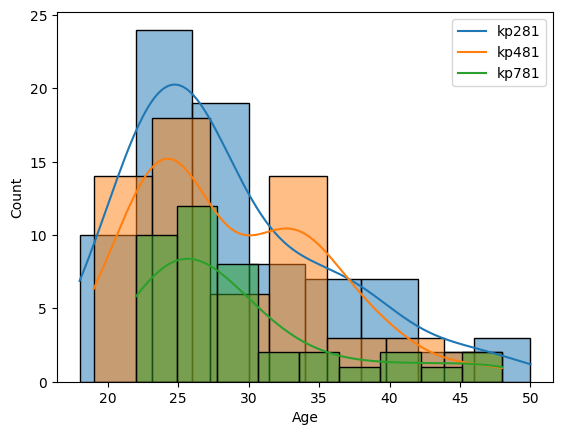

In [22]:
sns.histplot(kp281_data['Age'], kde=True)
sns.histplot(kp481_data['Age'], kde=True)
sns.histplot(kp781_data['Age'], kde=True)
plt.legend(labels=['kp281','kp481','kp781'])
plt.show()

#### In this histogram plot we can easily see that yes, age influence the product purchasing, our graph is countinuously decreasing when age is increasing. Aerofit max customers are bitween 20-30. And median of age for all product is near 25.

## Check Marital Status is effect on product purchasing using countplot

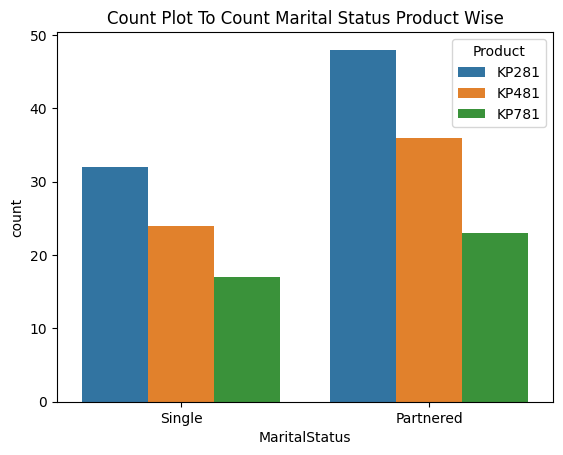

In [23]:
# Categorial-Categorial ('Bi-variate')
sns.countplot(x=df['MaritalStatus'], hue=df['Product'])
plt.title("Count Plot To Count Marital Status Product Wise")
plt.show()

In [24]:
ms_data = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], values=df['MaritalStatus'], aggfunc='count', margins=True)
ms_data

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


#### In above graph we can easily see the partnered [marital status] bar is high in every product category. And we also checked in crosstab method data. So we can say that situation can influence purchasing

# Now we checking marginal and conditional probability

In [25]:
# fist we get customers product and gender wise using cross tab
cust = pd.crosstab(index=df['Product'], columns=df['Gender'], values= df['Product'], aggfunc='count', margins=True)
# cust = pd.crosstab(index=df['Product'], columns=[df['Gender'],df['MaritalStatus']], values= df['Product'], aggfunc='count', margins=True)

In [26]:
cust = cust.reset_index()
cust

Gender,Product,Female,Male,All
0,KP281,40,40,80
1,KP481,29,31,60
2,KP781,7,33,40
3,All,76,104,180


# Question : what percentage of customers have purchased kp281,kp481 or kp781 

##### Answer : for that type of question we have to find marginal probability of each prodcuct, formula for marginal probability is = favorable outcomes / the total number of outcomes possible

In [27]:
# This is Marginal type probability which we denote P(Marginal Probability)

In [28]:
x = cust.loc[cust['Product']=='KP281']['All']
x2 = cust.loc[cust['Product']=='KP481']['All']
x3 = cust.loc[cust['Product']=='KP781']['All']

In [29]:
Total_Product = cust['All'][len(cust)-1]

In [30]:
prob_of_kp281 = x/Total_Product
prob_of_kp481 = x2/Total_Product
prob_of_kp781 = x3/Total_Product
prob_of_kp281,prob_of_kp481,prob_of_kp781

(0    0.444444
 Name: All, dtype: float64,
 1    0.333333
 Name: All, dtype: float64,
 2    0.222222
 Name: All, dtype: float64)

In [31]:
percentage_of_kp281 = prob_of_kp281*100
percentage_of_kp481 = prob_of_kp481*100
percentage_of_kp781 = prob_of_kp781*100
percentage_of_kp281,percentage_of_kp481,percentage_of_kp781

(0    44.444444
 Name: All, dtype: float64,
 1    33.333333
 Name: All, dtype: float64,
 2    22.222222
 Name: All, dtype: float64)

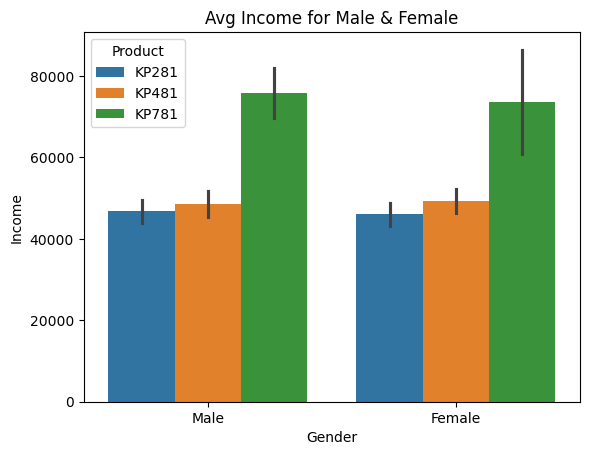

In [37]:
sns.barplot(x = df['Gender'],y=df['Income'], hue=df['Product'])
plt.title('Avg Income for Male & Female')
plt.show()

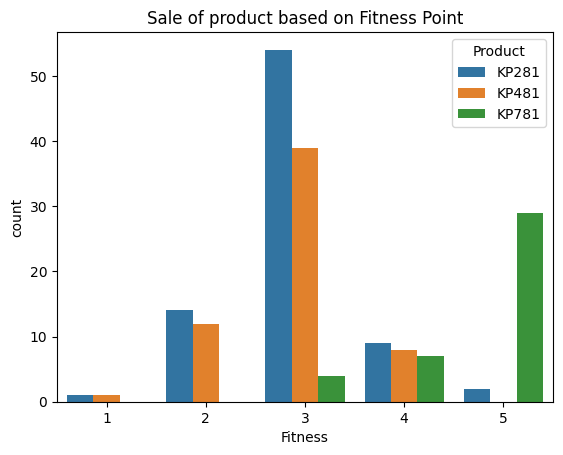

In [32]:
sns.countplot(hue=df['Product'], x=df['Fitness'])
plt.title('Sale of product based on Fitness Point')
plt.show()

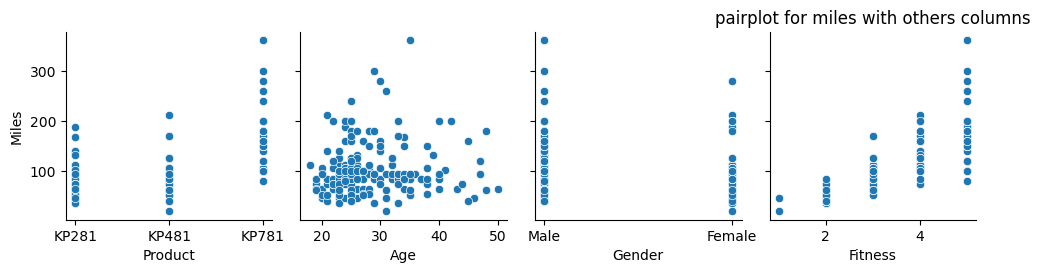

In [38]:
sns.pairplot(df, y_vars=["Miles"], x_vars=['Product','Age', 'Gender', 'Fitness'])
plt.title('pairplot for miles with others columns')
plt.show()

<AxesSubplot:xlabel='Usage', ylabel='Fitness'>

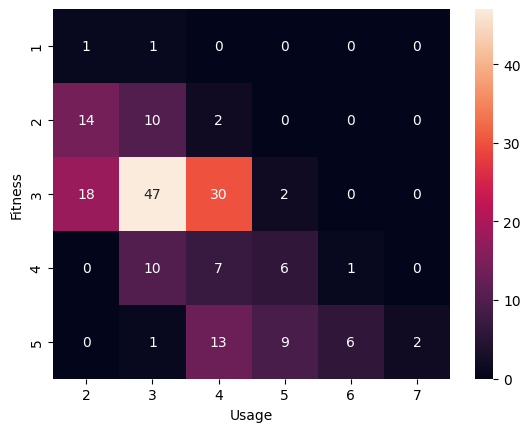

In [39]:
x = pd.crosstab(index = df['Fitness'], columns = df['Usage'])
sns.heatmap(x, annot=True)

## Question : what is the probability of a male customer buying a KP781 treadmill ?

In [33]:
# This is Conditional type probability we denote it with like this: p(A|B) = P(A intersection B)/p(B)

In [34]:
male_kp781 = cust.loc[cust['Product']=='KP781']['Male']

In [35]:
prob_of_male_in_kp781 = male_kp781/x3 #where x3 is total of kp781

In [36]:
prob_of_male_in_kp781

2    0.825
dtype: float64

## Insights For Aerofit Data :

1. In Aerofit data product "KP281" has highest sale individual and Gender wise.
2. Number of product purchased by Male is higher than female.
3. Mostly purchased Product by Female is Kp281. Lowest Purchased Product by Female is KP781.
4. Average Income for product Kp281,KP481 and KP781 is 46617,49459,76568 respectively.

    a. for men average income 46617,50028 and 77191.
    
    b. for female average income 46048,48891,69721.
    
5. Minimum Income For Product: 
    KP281 - Min = 29562 
    KP481 - Min = 31836
    KP781 - Min = 48556
5. Average Fitness for product KP281,KP481 and KP781 is 3,3,4.5 respectively. it is same for both Male and Female.
6. In Marital Status, As we saw in count plot, partnered purchased more number of product rather than single. 
7. As we saw in above plots fitness most sales are from 3,5 fitness point.

## Some recommendatios for Aerofit that could help in sale.

1. If someone's data matched with this data- Fitness level above 4, usage 5 times, Minimum Runing 80 miles and income above 48k, then salesperson recommendate KP781 product.
2. If someone's data matched with this data- Fitness level near 3, usage 3 times, Minimum Runing 21 miles and income above 31k, then salesperson recommendate KP481 product.
3. If someone's data matched with this data- Fitness level lower than 3, usage below 3 times, Runing 30 miles and income above 29k, then salesperson recommendate KP281 product.  